# NBA Shooting Data
This dataset contains shooting statistics for four different players during the 2021 NBA Playoffs.
In order to provide data-driven recommendations to improve the university basketball team performance, i will study and analyse past data from NBA players to provide tailored recommendations to the team which will come handy in decision making for the upcoming matches of the university basketball cup.
The main focus of this analysis will be on how we can increase the team chances\ likelihood of making shots, by learning from the professionals playing style; therefore increasing the team chances to win more matches.

## Data Dictionary
**Our dataset is composed by :**

|variable |class     |description                                                  |
|:--------|:---------|:------------------------------------------------------------|
|SHOOTER  |String    |Name of the player taking the shot                           |
|X        |float     |Horizontal distance of the shot taken from the basket in ft  |
|Y        |float     |Vertical distance of the shot taken from the basket in ft    |
|RANGE    |String    |Radius range of the shot taken from the basket in ft         |
|DEFENDER |String    |Name of the player defending the shot                        |
|SCORE    |String    |'MADE' if shot is scored, else 'MISSED'                      |


**OBSERVATION**

-The data set have a total of 776 observations and 6 columns.

-There is no missing value.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
data = pd.read_csv("nba_players_shooting.csv", index_col=0)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 776 entries, 0 to 775
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SHOOTER   776 non-null    object 
 1   X         776 non-null    float64
 2   Y         776 non-null    float64
 3   RANGE     776 non-null    object 
 4   DEFENDER  776 non-null    object 
 5   SCORE     776 non-null    object 
dtypes: float64(2), object(4)
memory usage: 42.4+ KB


## 1- Players stats and infos
To begin this analysis, we will first identify the players that are in our data set, and their different performance.

In [3]:
data.SHOOTER.value_counts()

Trae Young           329
Chris Paul           216
Seth Curry           147
Russell Westbrook     84
Name: SHOOTER, dtype: int64

In [4]:
score_made = ((data.SHOOTER[data.SCORE == "MADE"].value_counts()/data.SHOOTER.value_counts())*100).round(2)
score_made

Trae Young           43.16
Chris Paul           48.61
Seth Curry           57.82
Russell Westbrook    33.33
Name: SHOOTER, dtype: float64

In [5]:
score_missed = ((data.SHOOTER[data.SCORE == "MISSED"].value_counts()/data.SHOOTER.value_counts())*100).round(2)
score_missed

Trae Young           56.84
Chris Paul           51.39
Seth Curry           42.18
Russell Westbrook    66.67
Name: SHOOTER, dtype: float64

In [6]:
(score_made.sum()/4).round(2),(score_missed.sum()/4).round(2)

(45.73, 54.27)

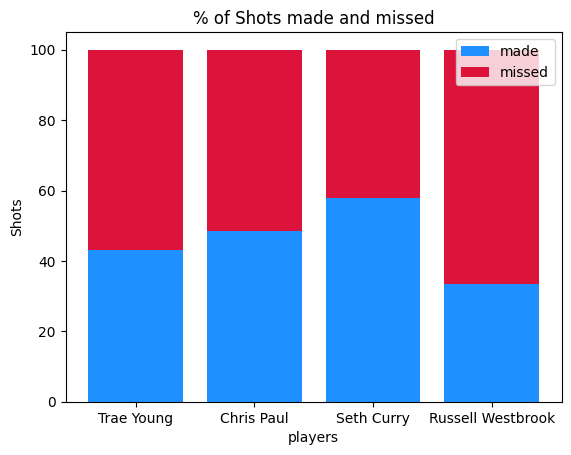

In [28]:
plt.bar(score_made.index, score_made.values, color='dodgerblue')
plt.bar(score_missed.index, score_missed.values, bottom=score_made.values, color='crimson')
plt.xlabel("players")
plt.ylabel("Shots")
plt.legend(["made", "missed"])
plt.title("% of Shots made and missed")
plt.show()

### Findings
**The four players that compose our dataset are:**

    - Trae Young, with 329 shots. 43% were made while 57% were missed.
    - Chris Paul, with 216 shots. 49% were made while 51% were missed.
    - Seth Curry, with 147 shots. 58% were made while 42% were missed.
    - and Russell Westbrook, with 84 shots. 33% were made while 67% were missed.
Therefore, from this dataset, 46% of shots were made while 54% were missed.

## 2 Optimal range
In this following section we will determine the optimal radius range from the basket for successful shots: the range at which each player most likely to score a shot

### 2.1 Shots by range 

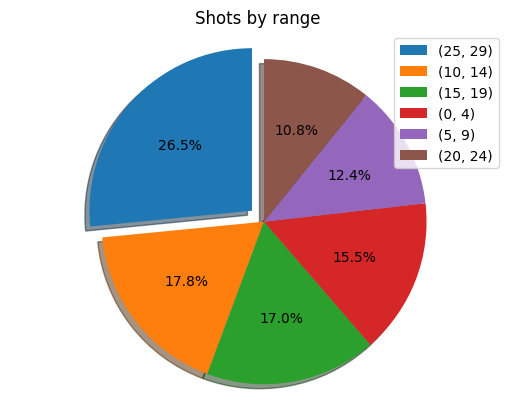

In [8]:
labels = data.RANGE.value_counts().index.tolist()
sizes = data.RANGE.value_counts().values.tolist()
explode = (0.1, 0, 0, 0,0,0)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Shots by range")
plt.legend(data.RANGE.value_counts().index.tolist())

plt.show()

##### Findings

-Radius range comprise between [25-29] feet is the one with the most number shots. followed [10-14] and [15-19].

-We note that radius range between [20-24] feet is the one less preferred by the players; followed by [5-9] and [0-4].



### 2-2 Shooter best and worst ranges.

In [9]:
TRB = data.RANGE[(data.SHOOTER == "Trae Young") & (data.SCORE == "MADE")].value_counts().idxmax(), 
TRW = data.RANGE[(data.SHOOTER == "Trae Young") & (data.SCORE == "MADE")].value_counts().idxmin()

In [10]:
CPB =data.RANGE[(data.SHOOTER == "Chris Paul") & (data.SCORE == "MADE")].value_counts().idxmax(),
CPW =data.RANGE[(data.SHOOTER == "Chris Paul") & (data.SCORE == "MADE")].value_counts().idxmin()

In [11]:
SCB = data.RANGE[(data.SHOOTER == "Seth Curry") & (data.SCORE == "MADE")].value_counts().idxmax(), 
SCW = data.RANGE[(data.SHOOTER == "Seth Curry") & (data.SCORE == "MADE")].value_counts().idxmin()

In [12]:
RWB = data.RANGE[(data.SHOOTER == "Russell Westbrook") & (data.SCORE == "MADE")].value_counts().idxmax(), 
RWW = data.RANGE[(data.SHOOTER == "Russell Westbrook") & (data.SCORE == "MADE")].value_counts().idxmin()

In [13]:
ranges = [[TRB,TRW],[CPB,CPW],[SCB,SCW],[RWB,RWW]]
n=0
for each in data.SHOOTER.value_counts().index.tolist():
    print( str(each) + str(ranges[n]))
    n+=1

Trae Young[('(0, 4)',), '(15, 19)']
Chris Paul[('(15, 19)',), '(20, 24)']
Seth Curry[('(25, 29)',), '(10, 14)']
Russell Westbrook[('(0, 4)',), '(5, 9)']


#### Findings
our findings are resumed in the table bellow :

|Shooter          |best range|worst range  |
|:----------------|:---------|:------------|
|Trae Young       |(0, 4)    |(15, 19)     |
|Chris Paul       |(15, 19)  |(20, 24)     |
|Seth Curry       |(25, 29)  |(10, 14)     |
Russell Westbrook |(0, 4)    |(5, 9)       |


### 2-3 Ranges with hihgest chance of success.

In [14]:
range_made =((data.RANGE[data.SCORE == "MADE"].value_counts()/data.RANGE.value_counts())*100).round(2)
range_made

(0, 4)      55.00
(10, 14)    47.83
(15, 19)    46.21
(20, 24)    48.81
(25, 29)    38.35
(5, 9)      48.96
Name: RANGE, dtype: float64

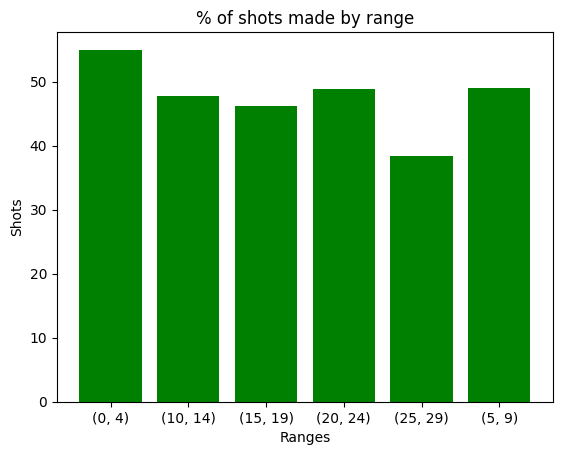

In [15]:
plt.bar(range_made.index,range_made.values, color='green')
plt.xlabel("Ranges")
plt.ylabel("Shots")
plt.title("% of shots made by range")
plt.show()

#### Findings

From the overall dataset we observe that shots made at the radius ranges that got the highest chances of being successful are comprised between:

- 0 to 4 feet, with 55% of success, ceteris paribus.
- 5 to 9 feet, with 48.96% of success, ceteris paribus.
- 20 to 24 feet, with 48.81 of chances.

**To your attention: note that shots made at radius range comprise between 25-29 feet were the ones with the lowest chances of being successful. they have 38.3% chances of being made**


## 3 - Optimal distance
Our next task will focus on the optimal X and Y distance from the basket to increase our chances to made shots.

### 3-1 Shots made by location

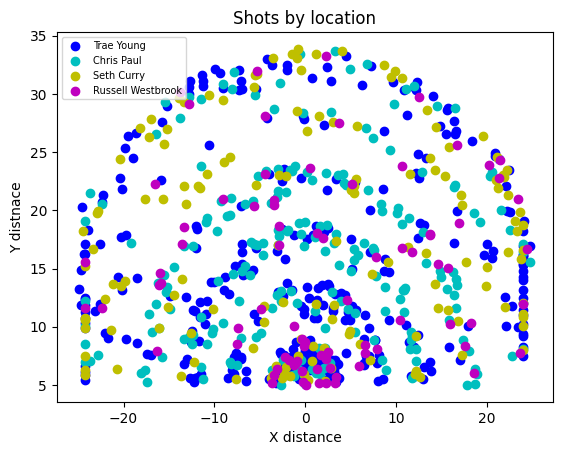

In [18]:
colrs = ['b', 'c', 'y', 'm']

tr = plt.scatter(data.X[data.SHOOTER == "Trae Young"],data.Y[data.SHOOTER == "Trae Young"], color=colors[0])
cp = plt.scatter(data.X[data.SHOOTER == "Chris Paul"],data.Y[data.SHOOTER == "Chris Paul"], color=colors[1])
sc = plt.scatter(data.X[data.SHOOTER == "Seth Curry"],data.Y[data.SHOOTER == "Seth Curry"], color=colors[2])
rw = plt.scatter(data.X[data.SHOOTER == "Russell Westbrook"],data.Y[data.SHOOTER == "Russell Westbrook"], color=colors[3])

plt.legend((tr, cp, sc, rw),
           ('Trae Young', 'Chris Paul', 'Seth Curry', "Russell Westbrook"),
           scatterpoints=1,
           loc='upper left',
           ncol=1,
           fontsize=7)
plt.xlabel("X distance")
plt.ylabel("Y distnace")
plt.title("Shots by location")

plt.show()

#### Findings

the shots by location scatter plot represents all the shot locations during the 2021 plays-off form our 4 players. 
from the graph we note that players have different preferred locations to shoot their shots, they tend to shoot more often the closer they are from the the basket(x(0)y(0)).

### 3-2 Shots made by location

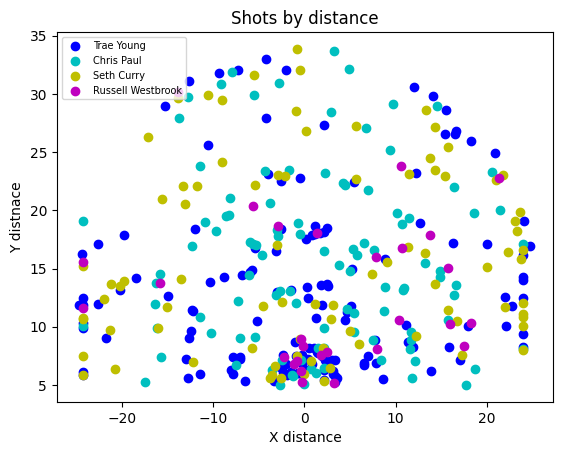

In [17]:
colors = ['b', 'c', 'y', 'm']

tr = plt.scatter(data.X[(data.SHOOTER == "Trae Young") & (data.SCORE == "MADE")],data.Y[(data.SHOOTER == "Trae Young") & (data.SCORE == "MADE")], color=colors[0])
cp = plt.scatter(data.X[(data.SHOOTER == "Chris Paul") & (data.SCORE == "MADE")],data.Y[(data.SHOOTER == "Chris Paul") & (data.SCORE == "MADE")], color=colors[1])
sc = plt.scatter(data.X[(data.SHOOTER == "Seth Curry") & (data.SCORE == "MADE")],data.Y[(data.SHOOTER == "Seth Curry") & (data.SCORE == "MADE")], color=colors[2])
rw = plt.scatter(data.X[(data.SHOOTER == "Russell Westbrook") & (data.SCORE == "MADE")],data.Y[(data.SHOOTER == "Russell Westbrook") & (data.SCORE == "MADE")], color=colors[3])

plt.legend((tr, cp, sc, rw),
           ('Trae Young', 'Chris Paul', 'Seth Curry', "Russell Westbrook"),
           scatterpoints=1,
           loc='upper left',
           ncol=1,
           fontsize=7)
plt.xlabel("X distance")
plt.ylabel("Y distnace")
plt.title("Shots by distance")
plt.show()

#### Findings

As we can see from our second scatter plot most of the shots that were made, were the ones shot closer to the basket. To be more precise, this represents the shots that were comprised between X[(-20) - (20)] and Y[(0 - (15)]. this area represent the optimal location were shots have more chances of being successful, with the chances increasing the closer we get to the basket. 

## 4 - Discussions of the findings, recommendations and conclusion

### 4.1 optimal range
First we found that the most preferred radius range from the overall players were [25-29],[10-14] and [15-19] feet from the basket while they preferred [20-24] feet the least followed by [5-9] and [0-4].  however our analysis revealed that shots taken in those 3 last radius ranges have more chances to end up in the basket than the ones taken from the most preferred radius ranges. Indeed, those 3 least preferred radius ranges were all 3 part of the optimal range, which were composed of the 3 most viable options from the 6. this optimal range is composed by:
- [0-4] feet with shot taken at this radius range having more than 50% chances to be successful.
- [5-9] feet, with 48.96% of success.
- [20-24] feet, with 48.81 of chances.

### 4.2 optimal distance
Even thought the overall player tend to get closer in order to shoot as suggested from our first scatter plot, we noticed that they still spend numerous shots away from the basket, the furthest being at coordinates (3,34). our analysis determine an area that have higher chances to make shots successful if taken from there. we decided to call it the optimal zone which is is any points in  X[(-20) - (20)] and Y[(0 - (15)] coordinates.

### 4.3 Recommendations
In order to maximize one's chances taking inspiration and learning from the experts/ pro is the first step towards success and enhancing one's performance that's why this analysis is relevant in order to give overall recommendations that will be helpful to the university's team in their optic to increase their shooting performance. those recommendations are: 
- always aim to take shots in the optimal radius range and especially in the [0-4] radius range.
- always aim to take shot the closer to the basket or at inside the optimal distance area.
if both recommendations are follow there are high chances that the team shooting performance increase.

#### NB
Our dataset were chosen randomly and composed of four different players form different teams, origins, skills and experience. which was designed to represent the NBA player's level as whole. So that the findings recommendations and conclusions can serve as general guideline on how to increase shooting performances based on professional playing styles and level. However note that our dataset were only composed of 4 different players and only 46% of their shots made were successful therefore the accuracy of the findings(46%) can be enhanced and the recommendations won't necessarily and always increase shots performance under any circumstances: they are guidelines not *"the secret recipes to made shots."*